## Analyzing Olympic Data Set from 1896 to 2016
### Reading the Datasets (By Multiprocessing ) - 

In [1]:

from Olympic_Functions import *
import warnings
warnings.filterwarnings('ignore')


world_gdp = read_data_df('world_gdp.csv', skiprows = 3)
noc_country = read_data_df('noc_regions.csv')
world_population = read_data_df('world_pop.csv')
olympics = read_data_df('athlete_events.csv') 
olympics_host = read_data_df('olym.csv',encoding="ISO-8859–1")



/Users/rj/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


### Shape of the Datasets
##### get_shape() function returns the rows and columns of Each Dataset 


In [2]:
print(get_shape(olympics))
print(get_shape(world_gdp))
print(get_shape(noc_country))
print(get_shape(world_population))
print(get_shape(olympics_host))

(271116, 15)
(219, 61)
(230, 3)
(217, 61)
(51, 7)


### Information about the Datasets
##### Description of the datasets 

### Olympics - 

In [3]:
get_info(olympics)



The Dataframe has 271116 rows and 15 columns
Column Names - 'ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal' 



### Word GDP -

In [4]:
get_info(world_gdp)



The Dataframe has 219 rows and 61 columns
Column Names - 'Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016' 



### National Occupational Classification (NOC) code of Countries - 

In [5]:
get_info(noc_country)



The Dataframe has 230 rows and 3 columns
Column Names - 'NOC', 'region', 'notes' 



### World Population (from 1964) -

In [6]:
get_info(world_population)


The Dataframe has 217 rows and 61 columns
Column Names - 'Country', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016' 



### Olympics Host Cities - 

In [7]:
get_info(olympics_host)


The Dataframe has 51 rows and 7 columns
Column Names - 'Host City', 'Country', 'Summer (Olympiad)', 'Winter', 'Year', 'latitude', 'longitude' 



### Get Missing Values from the dataset - 

##### Fetching the fields that have Missing Values (NaN) and their count 

In [8]:
get_missing_values(olympics)

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

### Data Cleaning
##### 1. Filling the NaN Values of Medal's table with 'DNW' (Did not win).
##### 2. Renaming Columns in NOC Table and dropping the Notes column
##### 3. Merging Olympics and NOC Tables to get tables that have valid NOC codes
##### 4. Dropping Columns Indicator Name, Indicator Code from World GDP Dataframe
##### 5. Merging World GDP with Countries table
##### 6. Merging World Population with Countries Table
##### 7. Removing redundant columns

In [9]:

Merge_olympics,merge_olympics_countrycode,olympics_merge_gdp,olympics_new,world_gdp,world_population,olympics_new  = data_cleaning(olympics, noc_country,world_gdp , world_population, olympics_host)
olympics_new.head()

Data Cleaning has been Completed


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country_x,Country Code,GDP,Population
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,DNW,China,CHN,4.269160e+11,1.164970e+09
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,DNW,China,CHN,8.560550e+12,1.350695e+09
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,DNW,Denmark,DNK,NaN,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,NaN,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,DNW,Netherlands,NLD,2.585680e+11,1.476009e+07


## Does Geography Influence Medal Tally?  

### Total Medals Overall by Country - Summer Olympics (Top 10)

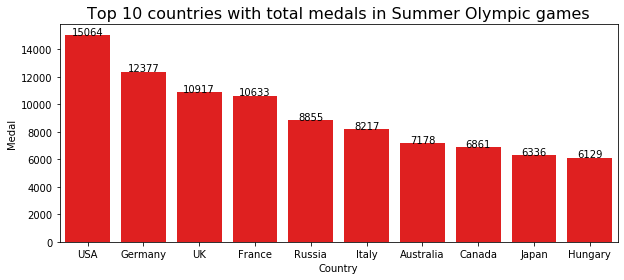

In [10]:
player = top_10_countries_summer(noc_country,olympics)


### Total Medals Overall by Country - Winter Olympics (Top 10)

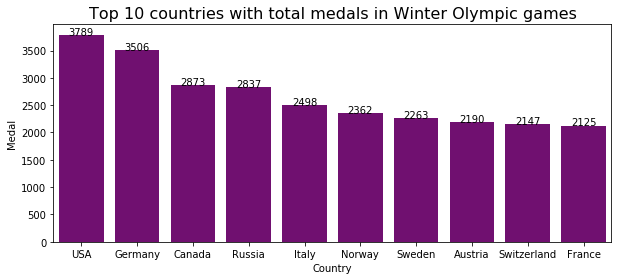

In [11]:
top_10_countries_winter(player)

###### We can see that countries in the northern Hemisphere(Cold regions) perform way better in Winter Olympics than Summer Olympics due to better adaptability

## Metrics of Olympics by Year -  
### Number of Athletes , Events , Sports Count Each Year  (Summer Olympics) - 
#### Inspired from - https://www.kaggle.com/arunsankar/key-insights-from-olympic-history-data

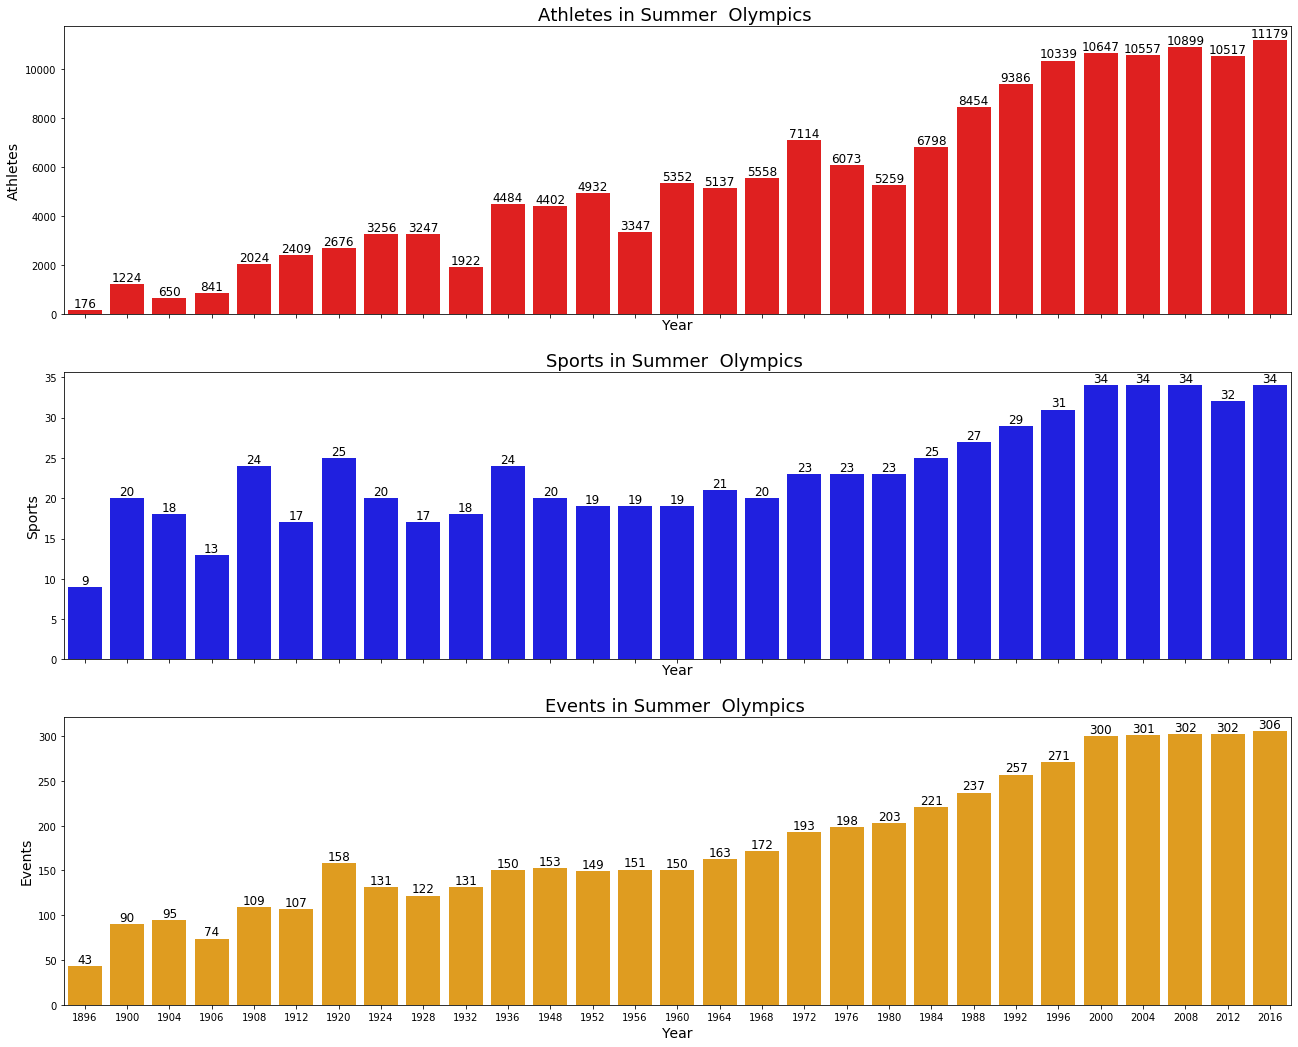

In [12]:
athletes_edition(olympics,'Summer')

### Number of Athletes , Events , Sports Count Each Year  (Winter Olympics)

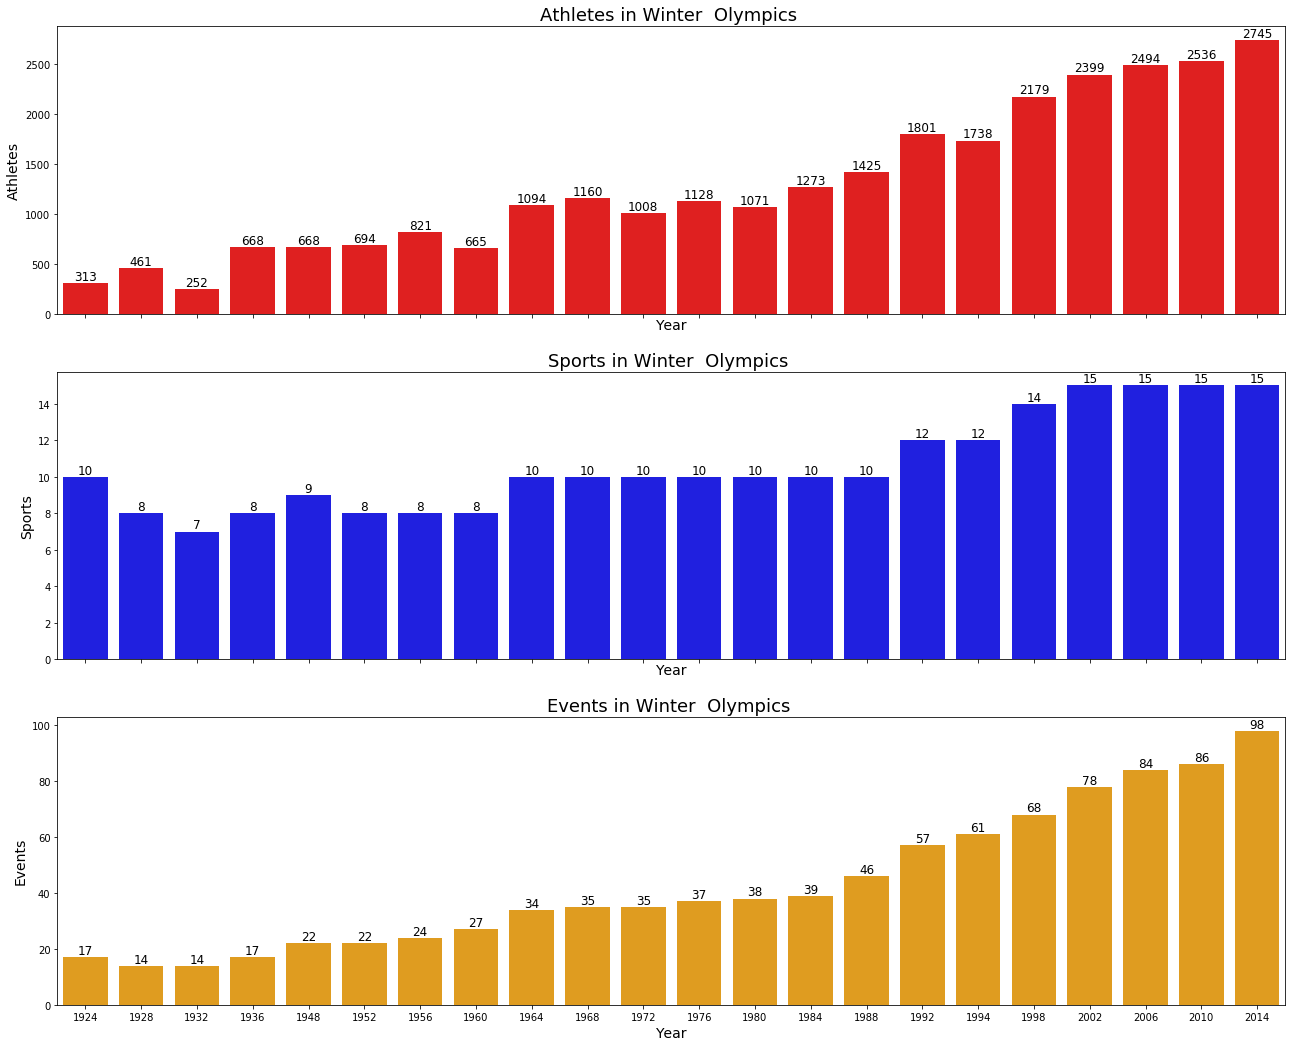

In [13]:
athletes_edition(olympics,"Winter")

## Influence of Physiological Factors

##### In this analysis , we try to explore the BMI of Athletes in Olympics .
##### BMI is a person's weight in kilograms (kg) divided by his or her height in meters squared. The National Institutes of Health (NIH) now defines normal weight, overweight, and obesity according to BMI rather than the traditional height/weight charts. Overweight is a BMI of 27.3 or more for women and 27.8 or more for men. 

### BMI Variations  of Participants in Various Sports (Male)

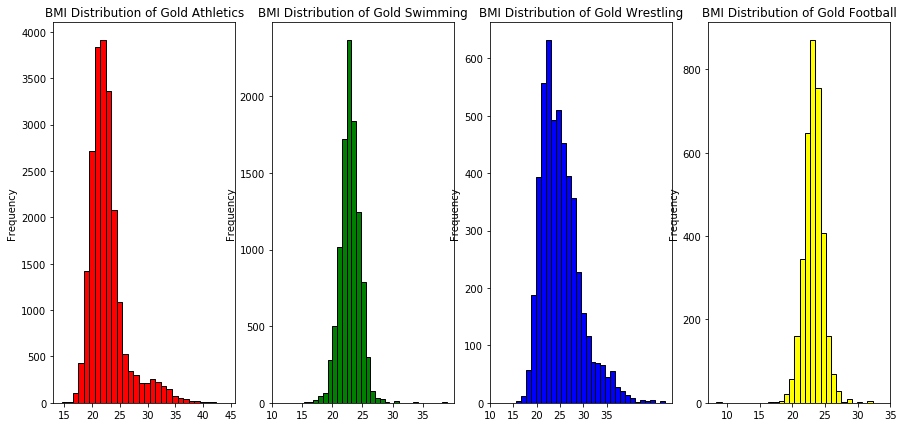

In [14]:
BMI_by_event_participants(olympics,'M')

### BMI Variations  of Participants in Various Sports (Female)

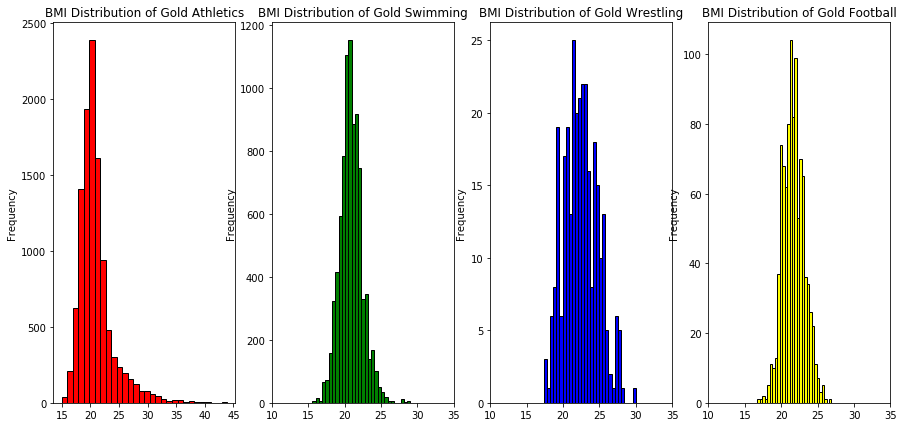

In [15]:
BMI_by_event_participants(olympics,'F')

### BMI of Gold Medalists in Various Sports (Male)

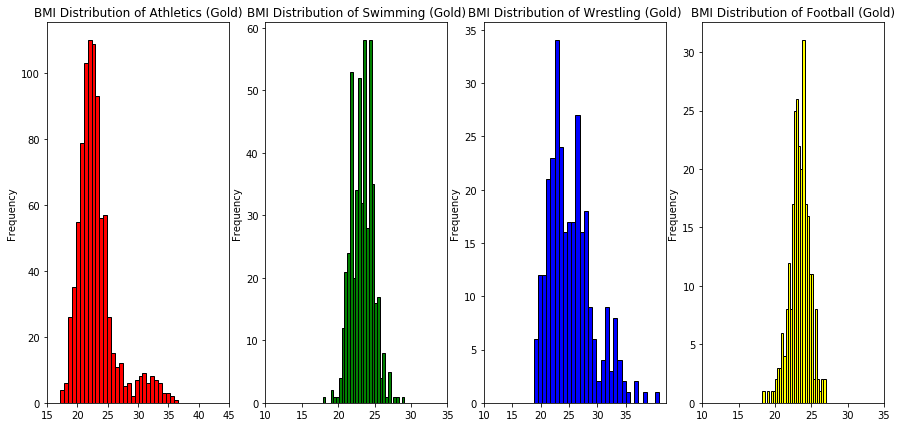

In [16]:
BMI_by_event_gold_medalists(olympics,'M')

### BMI of Gold Medalists in Various Sports (Female)

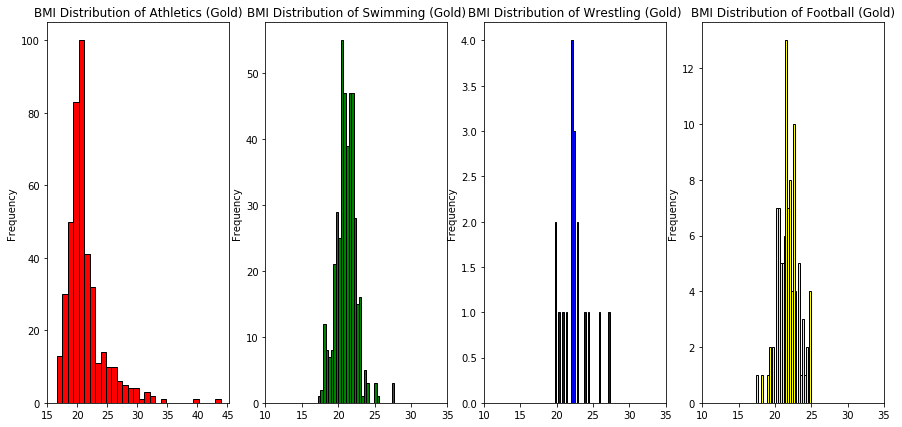

In [17]:
BMI_by_event_gold_medalists(olympics,'F')

##### We can see that BMI of Olymics is Normally Distributed (which brings factors like Standard Deviation , variance, Central Limit Theorem into Picture)
##### In Athletics , we can See that Frequency of Gold Medalists having BMI of 20 is way higher than others. 
##### In case a coach wants to pick a team member , this metric can be influencial and would help the coach understand who could be a better participant over the other.

### BMI variation by time of Gold Medalists in Athletics and Wrestling

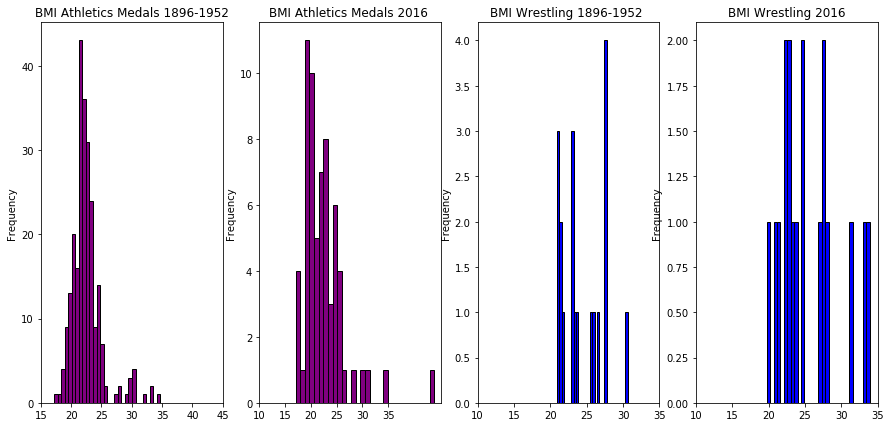

In [18]:
BMI_by_time_gold_medalists(olympics)

##### We can see that there is a difference is BMI when we compare athletes from 1896-1952 and 2016. This could be attributed to research advancements, fitness and better training regimen.

### We Analyse the Claims made by a Research Paper based on 1972 Olympics , when it comes to the Height , Weight and Age of the athletes

##### Research Paper - "Standards on age, height and weight in Olympic running events for men" 

##### The paper claims that Medalists in 100m Sprint event are Taller and heavier than other participants.
##### Additionally, we try to explore this claim for Age and BMI as well.

### Overall Participants Average Height ,Height of the Gold Medalist and Height of All Medalists ( Gold , Silver , Bronze ) of 100m Running Event  From 1896 -2016

In [19]:
summer_olympics = participants(olympics)
sprint_100m = sprinter_Height(summer_olympics)
sprint_100m

,Year,Overall Participants Average,Gold Medalists,All Medalists
0,1896,176.285714,183.0,173.333333
1,1900,175.714286,167.0,176.000000
2,1904,176.333333,167.0,174.500000
3,1906,177.181818,167.0,171.000000
4,1908,176.500000,170.0,174.000000
5,1912,177.787879,182.0,177.666667
6,1920,178.000000,172.0,175.000000
7,1924,172.615385,183.0,175.333333
8,1928,174.500000,170.0,177.000000
9,1932,175.541667,170.0,176.333333


### Overall Participants Average Weight ,Weight of the Gold Medalist and Weight of All Medalists ( Gold , Silver , Bronze ) of 100m Running Event  From 1896 -2016

In [20]:
sprint_100m = sprinter_weight(summer_olympics)
sprint_100m

,Year,Overall Participants Average,Gold Medalists,All Medalists
0,1896,70.857143,66.0,63.666667
1,1900,67.571429,58.0,64.333333
2,1904,68.833333,64.0,67.500000
3,1906,70.090909,64.0,67.000000
4,1908,69.368421,61.0,66.333333
5,1912,69.200000,73.0,70.000000
6,1920,71.076923,75.0,76.000000
7,1924,67.195652,75.0,66.666667
8,1928,67.360000,56.0,71.666667
9,1932,70.117647,65.0,73.333333


### Overall Participants Average Age ,Age of the Gold Medalist and Age of All Medalists ( Gold , Silver , Bronze ) of 100m Running Event  From 1896 -2016

In [21]:
sprint_100m = sprinter_age(summer_olympics)
sprint_100m

,Year,Overall Participants Average,Gold Medalists,All Medalists
0,1896,23.000000,21.0,22.500000
1,1900,21.833333,21.0,22.666667
2,1904,22.909091,23.0,21.000000
3,1906,23.928571,25.0,26.000000
4,1908,22.530612,19.0,22.333333
5,1912,22.492754,22.0,21.000000
6,1920,23.036364,19.0,21.666667
7,1924,23.185714,24.0,24.666667
8,1928,22.476923,19.0,21.666667
9,1932,23.074074,23.0,22.333333


In [22]:
sprint_100m = sprinter_bmi(summer_olympics)
sprint_100m

,Year,Overall Participants AverBMI,Gold Medalists,All Medalists
0,1896,22.642773,19.707964,21.220999
1,1900,21.806881,20.796730,20.772090
2,1904,22.159266,22.948116,22.191363
3,1906,22.277411,22.948116,22.902629
4,1908,22.129181,21.107266,21.885222
5,1912,21.927735,22.038401,22.160290
6,1920,22.431310,25.351541,24.827014
7,1924,22.596870,22.395413,21.633914
8,1928,22.009599,19.377163,22.761460
9,1932,22.522364,22.491349,23.527767


##### From the Above tables , we could clearly see that in most of the Olympic Editions , Gold Medalists, Other Medalists are Taller, Heavier and have higher BMI than the average of the overall Participants

### Correlation (How Correlated the country's medal Tally and the GDP of that Country)

##### GDP Plays a key role in a given country's economic growth. GDP contributes to infrastructure , especially the sports infrastructure which leads to better training facilities. Better Training facilities will lead to better performance in the olympics

##### In our Analysis , we can see that GDP has a correlation of 0.576 with the medal's tally which suggests a positive correleation

Populating the interactive namespace from numpy and matplotlib


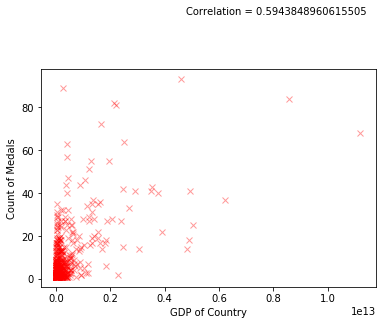

In [23]:
mergedframe,medalTotal_gdp = correlation(Merge_olympics,merge_olympics_countrycode,olympics_merge_gdp,olympics_new)


### Can we Predict the Overall Medal Tally of a given country ?

##### Research Paper - "Standards on age, height and weight in Olympic running events for men" -  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1859632/?page=2 

##### The Research Paper nails down 6 essential factors when it comes to influencing the medal tally of a given country
##### They are as follows - 

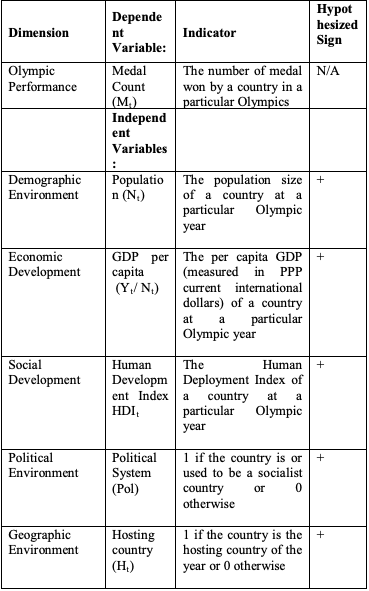


##### We try to fit a linear regression line having GDP , Population , GDP per Capita and No of athletes of a given country and see how our Predictor Works. 

##### Inspired By - https://www.kaggle.com/chadalee/olympics-data-cleaning-exploration-prediction

In [24]:

summary,rmse = medal_predictor(olympics,world_gdp,world_population,medalTotal_gdp)
summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Medal_Won_Corrected   R-squared:                       0.736
Model:                             OLS   Adj. R-squared:                  0.735
Method:                  Least Squares   F-statistic:                     632.5
Date:                 Sat, 21 Dec 2019   Prob (F-statistic):          1.36e-260
Time:                         21:14:54   Log-Likelihood:                -2848.2
No. Observations:                  912   AIC:                             5706.
Df Residuals:                      907   BIC:                             5730.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          7.7416      2.469      3.135      0.002       2.896      12.588
Log_GDP           -0.5928      0.139     -4.266      0.000      -0.866      -0.320
Log_Population     0.2702      0.129      2.088      0.037       0.016       0.524
Total_Athletes     0.1062      0.003     38.280      0.000       0.101       0.112
GDP_per_capita  9.919e-07   2.26e-06      0.440      0.660   -3.44e-06    5.42e-06
==============================================================================
Omnibus:                      600.733   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21093.476
Skew:                           2.469   Prob(JB):                         0.00
Kurtosis:                      26.037   Cond. No.                     1.22e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###### R-Squared Value  depicts how correlated a certain trend is, which means how related the variables in the equation are.  The variables account for 73.9 % of the variation in the medal tally

### Root Mean Square Error - 
##### The root mean square Error of the model is 5.624 , which means the model predicts with an error of around 5 Medals

In [25]:
rmse

5.496416693076249

### Best Performing Sport Event of a given Country
##### In this Analysis, we explore the best Sporting event of a country based in their Gold Medal Count. 

##### Inspired From - https://www.kaggle.com/chadalee/olympics-data-cleaning-exploration-prediction

In [26]:
countries = ['United States', 'Germany', 'China']
best,medal_tally_agnostic = team_performance(mergedframe,countries)
best.head(10)


,Team,Event,Gold_Medal_Count
0,China,Diving Women's Platform,7
1,China,Diving Women's Springboard,7
2,China,Table Tennis Women's Singles,7
3,China,Table Tennis Men's Singles,5
4,China,Weightlifting Men's Lightweight,5
5,China,Badminton Men's Singles,4
6,China,Diving Men's Springboard,4
7,China,Diving Women's Synchronized Platform,4
8,China,Gymnastics Men's Floor Exercise,4
9,China,Judo Women's Heavyweight,4


### Home Advantage
##### Countries actively place lucrative bids to get the hosting rights of every Olympics edition . Apart from Socio-political and economic reasons , we try to explore whether Home advantage impacts a given country's medals tally as well
##### Based on the previous and next olympics' medal tally, we can clearly see the home advantage enjoyed by the host country in the below table.

##### Inspired from - https://www.kaggle.com/chadalee/olympics-data-cleaning-exploration-prediction

In [27]:
year_host_team_medal = home_advantage(medal_tally_agnostic,mergedframe)
year_host_team_medal

,Year,Country,Team,Season,Medal_Won_Prev_Year,Medal_Won_Host_Year,Medal_Won_Next_Year
0,1964,Japan,Japan,Summer,-,29.0,25
1,1968,Mexico,Mexico,Summer,1,9.0,1
2,1972,West Germany,West Germany,Summer,26,39.0,39
3,1976,Canada,Canada,Summer,5,11.0,-
4,1984,United States,United States,Summer,-,173.0,94
5,1988,South Korea,South Korea,Summer,19,32.0,23
6,1992,Spain,Spain,Summer,4,22.0,17
7,1996,United States,United States,Summer,107,99.0,90
8,2000,Australia,Australia,Summer,40,57.0,-
9,2008,China,China,Summer,-,93.0,84


## Does History Impact Olympics?

### Participants Each Year - Summer Olympics

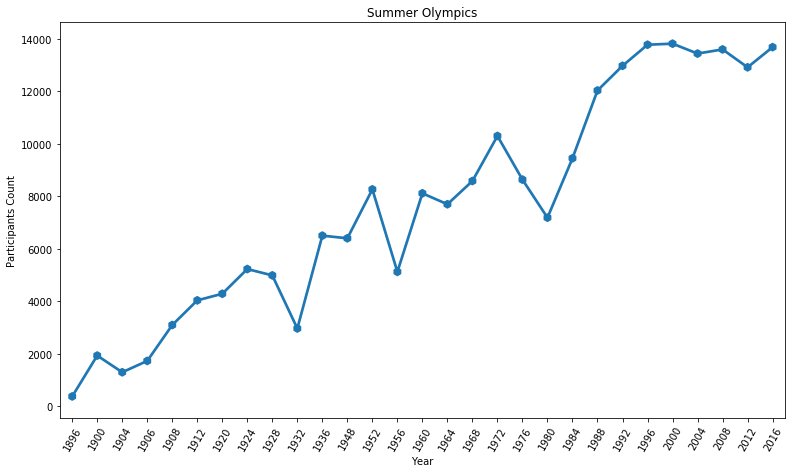

In [28]:
participants_edition(olympics,'Summer')

##### We can see a noticible dip in participation at 1936 , 1956and 1980  and No Participation during 1940  , 1944
##### On further exploration , we could see that the following Events Led to drastic change in the participation
##### 1936 Summer Olympics (Berlin, Germany) -  Hitler’s rise to power, less countries were invited , Racism .
##### 1940 and 1944 Summer Olympics (not held due to World War II)
##### 1956 Summer Olympics ( Melbourne, Australia) -  Suez Crisis (Egypt, Iraq, and Lebanon ) , Hungarian revolution (Netherlands, Spain, and Switzerland), Republic of China ( Formosa) . 
##### 1980 Summer Olympics (Moscow, Soviet Union) - Soviet invasion of Afghanistan (USA and its allies boycotted)
##### 1984 Summer Olympics (Los Angeles,  United States ) -Russia Boycotted (Security Reasons)


### Participants Each Year - Winter Olympics

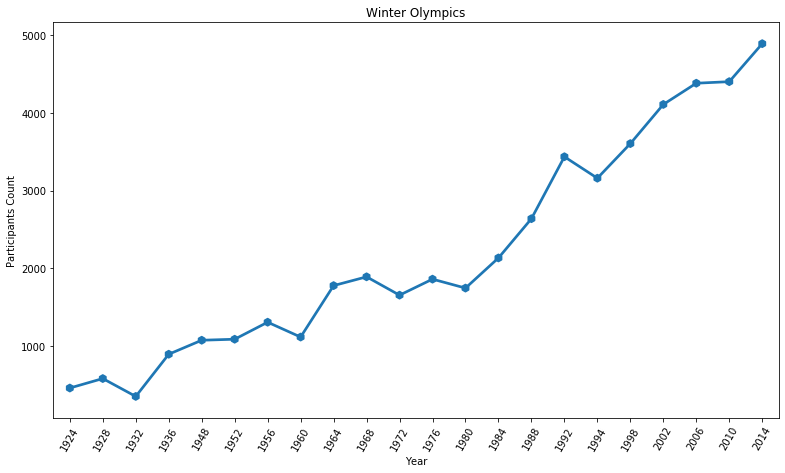

In [29]:
participants_edition(olympics,'Winter')

## References

### Datasets 

##### Olympics Dataset , NOC -  https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

##### GDP Dataset -  https://datahub.io/core/gdp

##### Population Dataset - https://vizhub.com/celtic660/datasets/world_pop


### Books and Research Papers 

##### 1. Jake VanderPlas. 2016. <em>Python Data Science Handbook: Essential Tools for Working with Data</em> (1st ed.). O'Reilly Media, Inc.
##### 2.  McKinney: "Python for Data Analysis", 2nd Edition, by Wes McKinney, ©2017.
##### 3. “Going for Gold Medals: Factors affecting Olympic Performance” -
“https://www.researchgate.net/publication/278585677_Going_for_Gold_Medals_Factors_affecting_Olympic_Performance
##### 4."Standards on age, height and weight in Olympic running events for men" -  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1859632/?page=2

### Online References 

##### 1. https://en.wikipedia.org/wiki/Olympic_Games
##### 2. https://stackoverflow.com/  
##### 3. https://www.olympic.org/
##### 4. https://towardsdatascience.com/understanding-the-need-for-optimization-when-using-pandas-8ce23b83330c
##### 5. https://www.kaggle.com/chadalee/olympics-data-cleaning-exploration-prediction
##### 6. https://www.kaggle.com/pavanraj159/olympics-history-1896-2016
##### 7. https://www.kaggle.com/arunsankar/key-insights-from-olympic-history-data
##### 8. https://en.wikipedia.org/wiki/List_of_Olympic_Games_scandals_and_controversies
